# Question 1

# Data Cleaning

In [221]:
import pandas as pd
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest
from sklearn import datasets
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

#Reading in dataframe from csv
df = pd.read_csv("US_census_18414616.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,41,Local-gov,32185,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
1,44,Private,126701,HS-grad,9,Divorced,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
2,26,Private,293690,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,58,United-States,>50K
3,22,?,354351,Some-college,10,Never-married,?,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,24,Private,196675,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,70,United-States,<=50K


In [222]:
#Checking data types of each column
df.dtypes

age                  int64
 workclass          object
 fnlwgt              int64
 education          object
 education-num       int64
 marital-status     object
 occupation         object
 relationship       object
 race               object
 sex                object
 capital-gain        int64
 capital-loss        int64
 hours-per-week      int64
 native-country     object
 Income-category    object
dtype: object

In [223]:
#Convert object columns to category
for column in df.select_dtypes(['object']).columns:
    df[column] = df[column].astype('category')
df.dtypes

age                    int64
 workclass          category
 fnlwgt                int64
 education          category
 education-num         int64
 marital-status     category
 occupation         category
 relationship       category
 race               category
 sex                category
 capital-gain          int64
 capital-loss          int64
 hours-per-week        int64
 native-country     category
 Income-category    category
dtype: object

In [224]:
# Clean the column names to remove white space after or in the name
df.columns = df.columns.str.replace(' ', '')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,41,Local-gov,32185,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
1,44,Private,126701,HS-grad,9,Divorced,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
2,26,Private,293690,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,58,United-States,>50K
3,22,?,354351,Some-college,10,Never-married,?,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,24,Private,196675,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,70,United-States,<=50K


In [225]:
#We can drop the "education" column as the "education-num" already covers the data in a numeric representation.
#Similarly, we can remove fnlwgt as it can lead to overfitting in the future and isn't as vital as some other columns.

df = df.drop(columns = ["education"])
df = df.drop(columns = ["fnlwgt"])
df.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,41,Local-gov,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
1,44,Private,9,Divorced,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
2,26,Private,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,58,United-States,>50K
3,22,?,10,Never-married,?,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,24,Private,9,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,70,United-States,<=50K


In [226]:
#Renaming "education-num" column to make the name more accurate

df = df.rename({"education-num" : "education-level"}, axis=1)
df.head()

,age,workclass,education-level,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,41,Local-gov,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
1,44,Private,9,Divorced,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
2,26,Private,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,58,United-States,>50K
3,22,?,10,Never-married,?,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,24,Private,9,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,70,United-States,<=50K


In [227]:
#We should check the Income-category column to see if the only 2 possible outcomes are ">50K" or "<=50K"

df["Income-category"].nunique()

2

In [228]:
#The Income-category can be converted to binary values to make training easier

label_encoder = LabelEncoder()
df["Income-category"] = label_encoder.fit_transform(df["Income-category"]) 

df.head()

,age,workclass,education-level,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,41,Local-gov,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
1,44,Private,9,Divorced,Craft-repair,Unmarried,White,Male,0,0,40,United-States,0
2,26,Private,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,58,United-States,1
3,22,?,10,Never-married,?,Not-in-family,White,Male,0,0,40,United-States,0
4,24,Private,9,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,70,United-States,0


In [229]:
#Checking how many entries per column are empty or not defined

for column in df.select_dtypes(['category']).columns:
    print(column, df[column].isnull().sum())

#We can see that no cells have null values but we know that there are ? present to represent missing data

workclass 0
marital-status 0
occupation 0
relationship 0
race 0
sex 0
native-country 0


In [230]:
#Therefore, we will check how many ? exist in all categorical column data cells

for column in df.select_dtypes(['category']).columns:
    print(column, df[column].str.contains(r'\?').sum())

workclass 254
marital-status 0
occupation 255
relationship 0
race 0
sex 0
native-country 87


In [231]:
#In the best case scenario, 87 rows are missing data and in the worst case it is 255. Removing any row with even 1 ? value would
#be too detrimental on the classification. Therefore we will keep the ? in the data set.

In [232]:
#We can also normalize the numeric features to make the classification more accurate and z-score normalization handles outliers
#well

for column in df.select_dtypes(['int64']).columns:
    df[column] = (df[column] - df[column].mean())/df[column].std()
df.head()

,age,workclass,education-level,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,0.169725,Local-gov,1.571060,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.148992,-0.211923,-0.035010,United-States,1
1,0.391087,Private,-0.411500,Divorced,Craft-repair,Unmarried,White,Male,-0.148992,-0.211923,-0.035010,United-States,0
2,-0.937083,Private,1.174548,Married-civ-spouse,Craft-repair,Husband,White,Male,-0.148992,-0.211923,1.460414,United-States,1
3,-1.232232,?,-0.014988,Never-married,?,Not-in-family,White,Male,-0.148992,-0.211923,-0.035010,United-States,0
4,-1.084658,Private,-0.411500,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.148992,-0.211923,2.457362,United-States,0


In [233]:
#Using the one label encoder to convert all categorical labels to numeric values for simpler training later on. The reason
#for using label encoding over onehot encoding is that with onehot encoding, the program would take a very long time to run at 
#the benefit of slightly higher accuracy. This decision was made in light of running a Neural Network with 10 and 20 hidden 
#layers which caused significant slow down.

for column in df.select_dtypes(['category']).columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,age,workclass,education-level,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,0.169725,2,1.571060,2,3,0,4,1,-0.148992,-0.211923,-0.035010,37,1
1,0.391087,4,-0.411500,0,2,4,4,1,-0.148992,-0.211923,-0.035010,37,0
2,-0.937083,4,1.174548,2,2,0,4,1,-0.148992,-0.211923,1.460414,37,1
3,-1.232232,0,-0.014988,4,0,1,4,1,-0.148992,-0.211923,-0.035010,37,0
4,-1.084658,4,-0.411500,2,5,0,2,1,-0.148992,-0.211923,2.457362,37,0


In [234]:
df.to_csv("US_census_18414616_cleaned.csv")

### Preparing data for fitting and training 

In [235]:
#Reading in dataframe from csv
df = pd.read_csv("US_census_18414616_cleaned.csv")
df.head()

,Unnamed: 0,age,workclass,education-level,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,0,0.169725,2,1.571060,2,3,0,4,1,-0.148992,-0.211923,-0.035010,37,1
1,1,0.391087,4,-0.411500,0,2,4,4,1,-0.148992,-0.211923,-0.035010,37,0
2,2,-0.937083,4,1.174548,2,2,0,4,1,-0.148992,-0.211923,1.460414,37,1
3,3,-1.232232,0,-0.014988,4,0,1,4,1,-0.148992,-0.211923,-0.035010,37,0
4,4,-1.084658,4,-0.411500,2,5,0,2,1,-0.148992,-0.211923,2.457362,37,0


In [236]:
#Removing error column
df = df.drop(columns = "Unnamed: 0")
df.head()

,age,workclass,education-level,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,0.169725,2,1.571060,2,3,0,4,1,-0.148992,-0.211923,-0.035010,37,1
1,0.391087,4,-0.411500,0,2,4,4,1,-0.148992,-0.211923,-0.035010,37,0
2,-0.937083,4,1.174548,2,2,0,4,1,-0.148992,-0.211923,1.460414,37,1
3,-1.232232,0,-0.014988,4,0,1,4,1,-0.148992,-0.211923,-0.035010,37,0
4,-1.084658,4,-0.411500,2,5,0,2,1,-0.148992,-0.211923,2.457362,37,0


In [237]:
#Isolating the Income-category column and saving it to variable
income_category = df.pop("Income-category")
income_category.head()

0    1
1    0
2    1
3    0
4    0
Name: Income-category, dtype: int64

# 1 Nearest Neighbour

In [238]:
#Splitting data into test and train on the original data frame.
X_train, X_test, Y_train, Y_test = train_test_split(df, income_category, random_state=1)

In [239]:
#Fitting the 1NN model with k=1 to the training data
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [240]:
#Applying the Sequential Forward Selection to the 1NN features.
sfs_forward = SFS(knn, 
                  k_features=12, 
                  forward=True, 
                  floating=False,
                  scoring='accuracy',
                  cv=5)

sfs_forward = sfs_forward.fit(df, income_category, custom_feature_names=df.columns)

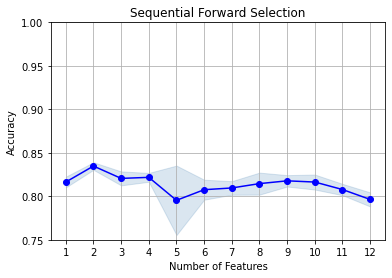

('age', 'workclass', 'education-level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country')


In [241]:
#Plotting the SFS to show the point at which the accuracy starts to decrease.
fig1 = plot_sfs(sfs_forward.get_metric_dict(), ylabel='Accuracy')

plot.ylim([0.75, 1])
plot.title('Sequential Forward Selection')
plot.grid()
plot.show()
print(sfs_forward.k_feature_names_)

In [242]:
#Based on the above graph, we can see that after 2 features, the accuracy decreases so we might as well use the first 2 features.

df_knn = df.drop(columns = ['education-level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'])

X_train, X_test, Y_train, Y_test = train_test_split(df_knn, income_category, random_state=1)

#Fitting the KNN model to the training data now excluding the columns that decrease accuracy
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [243]:
# Predict on the training dataset 
y_predicted = knn.predict(X_train)
knn_acc = accuracy_score(Y_train, y_predicted)
print(knn_acc)

0.7266666666666667


In [244]:
#We will cross validate to ensure that our model isn't just getting lucky/unlucky with its training data
#and that it actually can perform well for any variety of training data.
#We will shuffle 10 times before creating the folds.
cross_val = KFold(n_splits=10, shuffle=False, random_state=None)

In [245]:
#We will now rerun the tests with the folds included to produce the most fair outcome and the real accuracy of the model using
#this dataset.
#The result is closer to the true accuracy of the model.
results = cross_validate(knn, df_knn, income_category, cv=cross_val, scoring='balanced_accuracy')
test_score = results["test_score"]
print("Accuracy before cross validation: " f"{knn_acc}")
print("Accuracy after cross validation: "f"{test_score.mean():.3f}")
#As we can see the accuracy is better than a random classifier.

Accuracy before cross validation: 0.7266666666666667
Accuracy after cross validation: 0.560


# Decision Tree

In [246]:
#Splitting data into test and train on the original data frame.
X_train, X_test, Y_train, Y_test = train_test_split(df, income_category, random_state=1)

In [247]:
#Fitting the Decision Tree model to the training data
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [248]:
#Applying the Sequential Forward Selection to the Decision Tree features.
sfs_forward = SFS(dt, 
                  k_features=12, 
                  forward=True, 
                  floating=False,
                  scoring='accuracy',
                  cv=5)

sfs_forward = sfs_forward.fit(df, income_category, custom_feature_names=df.columns)

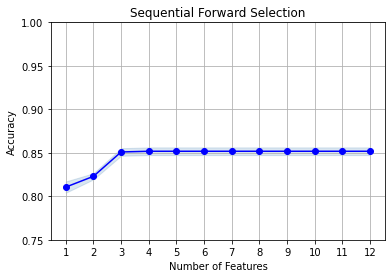

('age', 'workclass', 'education-level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country')


In [249]:
#Plotting the SFS to show the point at which the accuracy starts to decrease.
fig1 = plot_sfs(sfs_forward.get_metric_dict(), ylabel='Accuracy')

plot.ylim([0.75, 1])
plot.title('Sequential Forward Selection')
plot.grid()
plot.show()
print(sfs_forward.k_feature_names_)

In [250]:
#Based on the above graph, we can see that after 3 features, the accuracy remains the same so we can just as well drop
#the other features
df_dt = df.drop(columns = ['marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'])

X_train, X_test, Y_train, Y_test = train_test_split(df_dt, income_category, random_state=1)

#Fitting the Decision Tree model to the training data now excluding the columns that decrease accuracy
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [251]:
# Predict on the training dataset 
y_predicted = dt.predict(X_train)
dt_acc = accuracy_score(Y_train, y_predicted)
print(dt_acc)

0.7786666666666666


In [252]:
#We will cross validate to ensure that our model isn't just getting lucky/unlucky with its training data
#and that it actually can perform well for any variety of training data.

#We can use the cross_val variable defined before

In [253]:
#We will now rerun the tests with the folds included to produce the most fair outcome and the real accuracy of the model using
#this dataset.
#The result is closer to the true accuracy of the model.
results = cross_validate(dt, df_dt, income_category, cv=cross_val, scoring='balanced_accuracy')
test_score = results["test_score"]
print("Accuracy before cross validation: " f"{dt_acc}")
print("Accuracy after cross validation: "f"{test_score.mean():.3f}")
#As we can see the accuracy is better than a random classifier.

Accuracy before cross validation: 0.7786666666666666
Accuracy after cross validation: 0.609


# Neural Network

In [254]:
#Splitting data into test and train using original data frame
X_train, X_test, Y_train, Y_test = train_test_split(df, income_category, random_state=1)

In [255]:
#Fitting the Neural Network model with 10 hidden layers to the training data
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)
nn.fit(X_train, Y_train)

C:\Users\Luki\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 5), random_state=1,
              solver='lbfgs')

In [256]:
# Predict on the training dataset 
y_predicted = nn.predict(X_train)
nn_acc = accuracy_score(Y_train, y_predicted)
print(nn_acc)

0.8290666666666666


In [257]:
#We will cross validate to ensure that our model isn't just getting lucky/unlucky with its training data
#and that it actually can perform well for any variety of training data.

#We can use the cross_val variable defined before

In [258]:
#We will now rerun the tests with the folds included to produce the most fair outcome and the real accuracy of the model using
#this dataset.
#The result is closer to the true accuracy of the model.
results = cross_validate(dt, df, income_category, cv=cross_val, scoring='balanced_accuracy')
test_score = results["test_score"]
print("Accuracy before cross validation: " f"{nn_acc}")
print("Accuracy after cross validation: "f"{test_score.mean():.3f}")
#As we can see the accuracy is better than a random classifier.

Accuracy before cross validation: 0.8290666666666666
Accuracy after cross validation: 0.738


# Bagging

In [259]:
folds = 7
#We will iterate through the number of estimators, increasing them by 2 each time for a total of 20 at the final loop.

#Below we create lists to store the results of all the iterarions for each classifier with and without bagging.
knn_results = []
bagging_knn_results = []

dt_results = []
bagging_dt_results = []

nn_results = []
bagging_nn_results = []

for n in range(2,22,2):
    #Creating bagging classifiers for OneNN, Decision Tree and Neural Network.
    kNN_bag = BaggingClassifier(knn, 
                            n_estimators = n,
                            max_samples = 1.0, 
                            bootstrap = True, random_state=1)
    tree_bag = BaggingClassifier(dt, 
                            n_estimators = n,
                            max_samples = 1.0,  
                            bootstrap = True, random_state=1)
    nn_bag = BaggingClassifier(nn,
                           n_estimators = n,
                           max_samples = 1.0,
                           bootstrap = True, random_state=1)
    
    #We save the mean results of the regular classifier and bagged classifier into the corresponding lists
    scores_kNN = cross_val_score(knn, df_knn, income_category, cv=folds, verbose = 0, n_jobs = -1, scoring='accuracy')
    scores_kNN_bag = cross_val_score(kNN_bag, df_knn, income_category, cv=folds, verbose = 0, n_jobs = -1)

    knn_results.append(scores_kNN.mean())
    bagging_knn_results.append(scores_kNN_bag.mean())

    scores_tree = cross_val_score(dt, df_dt, income_category, cv=folds, verbose = 0, n_jobs = -1)
    scores_tree_bag = cross_val_score(tree_bag, df_dt, income_category, cv=folds, verbose = 0, n_jobs = -1)

    dt_results.append(scores_tree.mean())
    bagging_dt_results.append(scores_tree_bag.mean())

    scores_nn = cross_val_score(nn, df, income_category, cv=folds, verbose = 0, n_jobs = -1)
    scores_nn_bag = cross_val_score(nn_bag, df, income_category, cv=folds, verbose = 0, n_jobs = -1)

    nn_results.append(scores_nn.mean())
    bagging_nn_results.append(scores_nn_bag.mean())
    


In [260]:
#Priting the results of the diffrent classifiers without bagging and then each bagging result.

#The first element of the knn_result/dt_results/nn_results is printed as all of the values in this list are the same.
print("Mean Result for One-NN: {:.4f}".format(knn_results[0]))
print("\n")

for i in range(len(bagging_knn_results)):
  print("Mean Results for One-NN with bagging: {:.4f}".format(bagging_knn_results[i]))

print("\n")
print("====================================================")

print("Mean Result for Decision Tree: {:.4f}".format(dt_results[0]))
print("\n")

for i in range(len(bagging_dt_results)):
  print("Mean Results for Decision Tree with bagging: {:.4f}".format(bagging_dt_results[i]))


print("\n")
print("====================================================")

print("Mean Result for Neural Network: {:.4f}".format(nn_results[0]))
print("\n")

for i in range(len(bagging_nn_results)):
  print("Mean Results for Neural Network with bagging: {:.4f}".format(bagging_nn_results[i]))


Mean Result for One-NN: 0.6764


Mean Results for One-NN with bagging: 0.7436
Mean Results for One-NN with bagging: 0.7516
Mean Results for One-NN with bagging: 0.7522
Mean Results for One-NN with bagging: 0.7484
Mean Results for One-NN with bagging: 0.7540
Mean Results for One-NN with bagging: 0.7542
Mean Results for One-NN with bagging: 0.7568
Mean Results for One-NN with bagging: 0.7574
Mean Results for One-NN with bagging: 0.7580
Mean Results for One-NN with bagging: 0.7562


Mean Result for Decision Tree: 0.7912


Mean Results for Decision Tree with bagging: 0.7948
Mean Results for Decision Tree with bagging: 0.7976
Mean Results for Decision Tree with bagging: 0.7978
Mean Results for Decision Tree with bagging: 0.7954
Mean Results for Decision Tree with bagging: 0.7952
Mean Results for Decision Tree with bagging: 0.7952
Mean Results for Decision Tree with bagging: 0.7952
Mean Results for Decision Tree with bagging: 0.7952
Mean Results for Decision Tree with bagging: 0.7952
Mean Re

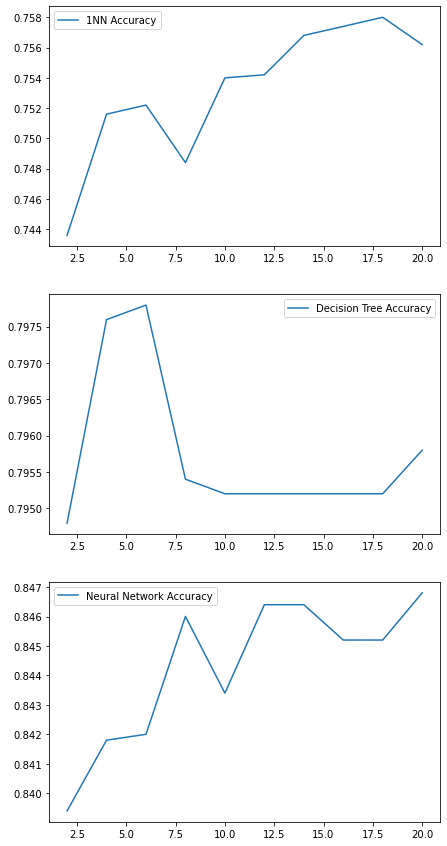

In [261]:
#Plotting results of bagging
fig,axs = plot.subplots(3, figsize = (7, 15))
axs[0].plot(range(2,22,2), bagging_knn_results, label="1NN Accuracy")
axs[1].plot(range(2,22,2), bagging_dt_results, label="Decision Tree Accuracy")
axs[2].plot(range(2,22,2), bagging_nn_results, label="Neural Network Accuracy")
axs[0].legend()
axs[1].legend()
axs[2].legend()

### Results for 1NN 
The accuracy of the 1NN classifier tends to increase as we increase the number of estimators. There is a drop in accuracy when 8 estimators are used, as seen in the above graph. However, overall, the graph indicates a steady improvement in accuracy as more estimators are added. After 18 estimators, accuracy starts to decrease.

Based on the graph, the optimal number of estimators for 1NN with bagging is: 18 (75.8% accuracy)

### Results for Decision Tree
At a low number of estimators, the accuracy increases until it reaches 6. After that we witness a sharp decline. However, this decline is only a decline of 0.25%. As the number of estimators reaches 18, it begins to gradually increase again. 

Based on the graph, the optimal number of estimators for Decision Tree with bagging is: 6 (79.78% accuracy)

### Results for Neural Network
Similarly to 1NN, the graph shows a steady increase in accuracy as estimators increase with the exception of n_etimators=10 where the graph dips by about 0.25%. Following this dip it increases and again dips at 16 estimators. As it reaches 20, the graph ascends again. 

Based on the graph, the optimal number of estimators for Neural Networks with bagging is: 12 (84.64% accuracy)

In [262]:
#Using the optimal values for the number of estimators, we will investigate the effect of changing the max_samples for bagging.

#Below we create lists to store the results of all the iterarions for each classifier with and without bagging.
knn_results = []
bagging_knn_results = []

dt_results = []
bagging_dt_results = []

nn_results = []
bagging_nn_results = []

for n in np.linspace(0.1,1,10):
    #Creating bagging classifiers for OneNN, Decision Tree and Neural Network.
    kNN_bag = BaggingClassifier(knn, 
                            n_estimators = 18,
                            max_samples = n, 
                            bootstrap = True, random_state=1)
    tree_bag = BaggingClassifier(dt, 
                            n_estimators = 6,
                            max_samples = n,  
                            bootstrap = True, random_state=1)
    nn_bag = BaggingClassifier(nn,
                           n_estimators = 12,
                           max_samples = n,
                           bootstrap = True, random_state=1)
    
    #We save the mean results of the regular classifier and bagged classifier into the corresponding lists
    scores_kNN = cross_val_score(knn, df_knn, income_category, cv=folds, verbose = 0, n_jobs = -1, scoring='accuracy')
    scores_kNN_bag = cross_val_score(kNN_bag, df_knn, income_category, cv=folds, verbose = 0, n_jobs = -1)

    knn_results.append(scores_kNN.mean())
    bagging_knn_results.append(scores_kNN_bag.mean())

    scores_tree = cross_val_score(dt, df_dt, income_category, cv=folds, verbose = 0, n_jobs = -1)
    scores_tree_bag = cross_val_score(tree_bag, df_dt, income_category, cv=folds, verbose = 0, n_jobs = -1)

    dt_results.append(scores_tree.mean())
    bagging_dt_results.append(scores_tree_bag.mean())

    scores_nn = cross_val_score(nn, df, income_category, cv=folds, verbose = 0, n_jobs = -1)
    scores_nn_bag = cross_val_score(nn_bag, df, income_category, cv=folds, verbose = 0, n_jobs = -1)

    nn_results.append(scores_nn.mean())
    bagging_nn_results.append(scores_nn_bag.mean())
    


In [263]:
#Priting the results of the diffrent classifiers without bagging and then each set of bagging results.

#The first element of the knn_result/dt_results/nn_results is printed as all of the values in this list are the same.
print("Mean Result for One-NN: {:.4f}".format(knn_results[0]))
print("\n")

for i in range(len(bagging_knn_results)):
  print("Mean Results for One-NN with bagging and optimal value: {:.4f}".format(bagging_knn_results[i]))

print("\n")
print("====================================================")

print("Mean Result for Decision Tree: {:.4f}".format(dt_results[0]))
print("\n")

for i in range(len(bagging_dt_results)):
  print("Mean Results for Decision Tree with bagging and optimal value: {:.4f}".format(bagging_dt_results[i]))


print("\n")
print("====================================================")

print("Mean Result for Neural Network: {:.4f}".format(nn_results[0]))
print("\n")

for i in range(len(bagging_nn_results)):
  print("Mean Results for Neural Network with bagging and optimal value: {:.4f}".format(bagging_nn_results[i]))


Mean Result for One-NN: 0.6764


Mean Results for One-NN with bagging and optimal value: 0.7628
Mean Results for One-NN with bagging and optimal value: 0.7550
Mean Results for One-NN with bagging and optimal value: 0.7556
Mean Results for One-NN with bagging and optimal value: 0.7566
Mean Results for One-NN with bagging and optimal value: 0.7574
Mean Results for One-NN with bagging and optimal value: 0.7582
Mean Results for One-NN with bagging and optimal value: 0.7554
Mean Results for One-NN with bagging and optimal value: 0.7558
Mean Results for One-NN with bagging and optimal value: 0.7596
Mean Results for One-NN with bagging and optimal value: 0.7580


Mean Result for Decision Tree: 0.7912


Mean Results for Decision Tree with bagging and optimal value: 0.7970
Mean Results for Decision Tree with bagging and optimal value: 0.7970
Mean Results for Decision Tree with bagging and optimal value: 0.7980
Mean Results for Decision Tree with bagging and optimal value: 0.7988
Mean Results fo

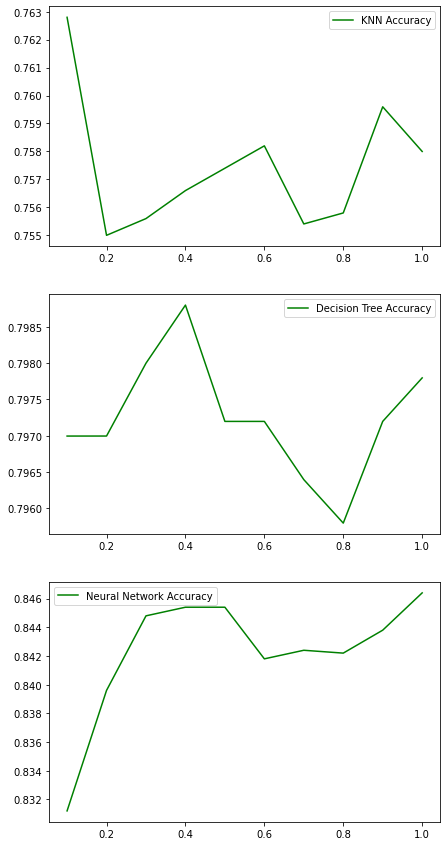

In [264]:
#Plotting results of bagging and optimal estimator value
fig,axs = plot.subplots(3, figsize = (7, 15))
axs[0].plot(np.linspace(0.1,1,10), bagging_knn_results, label="KNN Accuracy", color="green")
axs[1].plot(np.linspace(0.1,1,10), bagging_dt_results, label="Decision Tree Accuracy", color="green")
axs[2].plot(np.linspace(0.1,1,10), bagging_nn_results, label="Neural Network Accuracy", color="green")
axs[0].legend()
axs[1].legend()
axs[2].legend()

### Results for 1NN with optimal estimator
As we change the bootstrap samples, the classifier drops in accuracy from 76.28% at 0.1 to 75.5% at 0.2. The accuracy steadily improves but never reaches the original highest value. With max_samples = 1.0 the accuracy settles at 75.8%.

Highest accuracy: 76.28%, max_samples = 0.1

### Results for Decision Trees with optimal estimator
The classifier peaks at 0.4 max_samples value but declines sharply for 0.8 by around 0.3%. It again increases for a final value of 79.78%.

Highest accuracy: 79.88%, max_samples = 0.4

### Results for Neural Network with optimal estimator
The Neural Network classifier increases steadily overall with a slight dip at max_samples = 0.6. It has a final value of 84.64% at 1.0.

Highest accuracy: 84.64%, max_samples = 1.0


# Random Subspacing

In [265]:
folds = 7
#We will iterate through the number of estimators, increasing them by 2 each time for a total of 20 at the final loop.

#Below we create lists to store the results of all the iterarions for each classifier with and without bagging.
knn_results = []
rSS_knn_results = []

dt_results = []
rSS_dt_results = []

nn_results = []
rSS_nn_results = []

for n in range(2,22,2):
    #Creating random subspacing classifiers for OneNN, Decision Tree and Neural Network.
    random_SS_kNN = BaggingClassifier(knn, 
                            n_estimators = n,
                            max_samples=1.0, 
                            max_features=0.7, random_state=1)

    random_SS_tree = BaggingClassifier(dt, 
                            n_estimators = n,
                            max_samples=1.0, 
                            max_features=0.7, random_state=1)

    random_SS_nn = BaggingClassifier(nn, 
                            n_estimators = n,
                            max_samples=1.0, 
                            max_features=1.0, random_state=1)
    
    #We save the mean results of the regular classifier and random subspacing classifier into the corresponding lists
    scores_kNN = cross_val_score(knn, df_knn, income_category, cv=folds, verbose = 0, n_jobs = -1)
    scores_kNN_rSS = cross_val_score(random_SS_kNN, df_knn, income_category, cv=folds, verbose = 0, n_jobs = -1)

    knn_results.append(scores_kNN.mean())
    rSS_knn_results.append(scores_kNN_rSS.mean())

    scores_tree = cross_val_score(dt, df_dt, income_category, cv=folds, verbose = 0, n_jobs = -1)
    scores_tree_rSS = cross_val_score(random_SS_tree, df_dt, income_category, cv=folds, verbose = 0, n_jobs = -1)

    dt_results.append(scores_tree.mean())
    rSS_dt_results.append(scores_tree_rSS.mean())

    scores_nn = cross_val_score(nn, df, income_category, cv=folds, verbose = 0, n_jobs = -1)
    scores_nn_rSS = cross_val_score(random_SS_nn, df, income_category, cv=folds, verbose = 0, n_jobs = -1)

    nn_results.append(scores_nn.mean())
    rSS_nn_results.append(scores_nn_rSS.mean())

In [266]:
#Priting the results of the different classifiers without random subspacing and then each set of random subspacing results.

#The first element of the knn_result/dt_results/nn_results is printed as all of the values in this list are the same.
print("Mean Result for One-NN: {:.4f}".format(knn_results[0]))
print("\n")

for i in range(len(rSS_knn_results)):
  print("Mean Results for One-NN with random subspacing: {:.4f}".format(rSS_knn_results[i]))

print("\n")
print("====================================================")

print("Mean Result for Decision Tree: {:.4f}".format(dt_results[0]))
print("\n")

for i in range(len(rSS_dt_results)):
  print("Mean Results for Decision Tree with random subspacing: {:.4f}".format(rSS_dt_results[i]))


print("\n")
print("====================================================")

print("Mean Result for Neural Network: {:.4f}".format(nn_results[0]))
print("\n")

for i in range(len(rSS_nn_results)):
  print("Mean Results for Neural Network with random subspacing: {:.4f}".format(rSS_nn_results[i]))

Mean Result for One-NN: 0.6764


Mean Results for One-NN with random subspacing: 0.7132
Mean Results for One-NN with random subspacing: 0.7400
Mean Results for One-NN with random subspacing: 0.7532
Mean Results for One-NN with random subspacing: 0.7600
Mean Results for One-NN with random subspacing: 0.7592
Mean Results for One-NN with random subspacing: 0.7608
Mean Results for One-NN with random subspacing: 0.7636
Mean Results for One-NN with random subspacing: 0.7632
Mean Results for One-NN with random subspacing: 0.7636
Mean Results for One-NN with random subspacing: 0.7640


Mean Result for Decision Tree: 0.7912


Mean Results for Decision Tree with random subspacing: 0.7918
Mean Results for Decision Tree with random subspacing: 0.7798
Mean Results for Decision Tree with random subspacing: 0.7818
Mean Results for Decision Tree with random subspacing: 0.7890
Mean Results for Decision Tree with random subspacing: 0.7954
Mean Results for Decision Tree with random subspacing: 0.7946
Mea

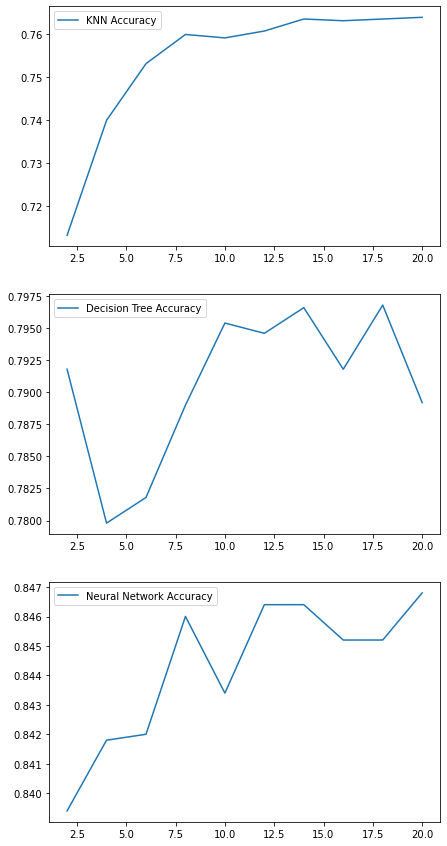

In [267]:
#Plotting results of random subspacing
fig,axs = plot.subplots(3, figsize = (7, 15))
axs[0].plot(range(2,22,2), rSS_knn_results, label="KNN Accuracy")
axs[1].plot(range(2,22,2), rSS_dt_results, label="Decision Tree Accuracy")
axs[2].plot(range(2,22,2), rSS_nn_results, label="Neural Network Accuracy")
axs[0].legend()
axs[1].legend()
axs[2].legend()

### Results for 1NN
From the graph we can see that the accuracy increases in a logarithmic fashion. There are minimal accuracy dips and the graph plateaus around the 20 estimator count.

Based on the graph, the optimal number of estimators for 1NN with random subspacing is: 20 (76.4% accuracy)

### Results for Decision Tree
When we reach 4 estimators there is a sharp dip in accuracy of almost 1%, but as the estimator count increases so does the accuracy. We can see the gragh begin to dip at higher estimator counts.

Based on the graph, the optimal number of estimators for Decision Tree with random subspacing is: 18 (79.68% accuracy)

### Results for Neural Network
The Neural Network classifier shows and overall increase in accuracy with rising estimator number with notable dips at 10 and 16 estimators. However, at count 20, the classifier still shows a tendancy to increasing accuracy.

Based on the graph, the optimal number of estimators for Neural Networks with random subspacing is: 20 (84.68% accuracy)

In [268]:
#Using the optimal values for the number of estimators, we will investigate the effect of changing the max_features for random
#subspacing.

#Below we create lists to store the results of all the iterarions for each classifier with and without random subspacing.
knn_results = []
rSS_knn_results = []

dt_results = []
rSS_dt_results = []

nn_results = []
rSS_nn_results = []

for n in np.linspace(0.1,1,10):
    #Creating random subspacing classifiers for OneNN, Decision Tree and Neural Network.
    random_SS_kNN = BaggingClassifier(knn, 
                            n_estimators = 20,
                            max_samples=1.0, 
                            max_features=n, random_state=1)

    random_SS_tree = BaggingClassifier(dt, 
                            n_estimators = 18,
                            max_samples=1.0, 
                            max_features=n, random_state=1)

    random_SS_nn = BaggingClassifier(nn, 
                            n_estimators = 20,
                            max_samples=1.0, 
                            max_features=n, random_state=1)
    
    #We save the mean results of the regular classifier and random subspacing classifier into the corresponding lists
    scores_kNN = cross_val_score(knn, df_knn, income_category, cv=folds, verbose = 0, n_jobs = -1)
    scores_kNN_rSS = cross_val_score(random_SS_kNN, df_knn, income_category, cv=folds, verbose = 0, n_jobs = -1)

    knn_results.append(scores_kNN.mean())
    rSS_knn_results.append(scores_kNN_rSS.mean())

    scores_tree = cross_val_score(dt, df_dt, income_category, cv=folds, verbose = 0, n_jobs = -1)
    scores_tree_rSS = cross_val_score(random_SS_tree, df_dt, income_category, cv=folds, verbose = 0, n_jobs = -1)

    dt_results.append(scores_tree.mean())
    rSS_dt_results.append(scores_tree_rSS.mean())

    scores_nn = cross_val_score(nn, df, income_category, cv=folds, verbose = 0, n_jobs = -1)
    scores_nn_rSS = cross_val_score(random_SS_nn, df, income_category, cv=folds, verbose = 0, n_jobs = -1)

    nn_results.append(scores_nn.mean())
    rSS_nn_results.append(scores_nn_rSS.mean())

In [269]:
#Priting the results of the different classifiers without random sampling and then each random sampling result.

#The first element of the knn_result/dt_results/nn_results is printed as all of the values in this list are the same.
print("Mean Result for One-NN: {:.4f}".format(knn_results[0]))
print("\n")

for i in range(len(rSS_knn_results)):
  print("Mean Results for One-NN with random subspacing: {:.4f}".format(rSS_knn_results[i]))

print("\n")
print("====================================================")

print("Mean Result for Decision Tree: {:.4f}".format(dt_results[0]))
print("\n")

for i in range(len(rSS_dt_results)):
  print("Mean Results for Decision Tree with random subspacing: {:.4f}".format(rSS_dt_results[i]))


print("\n")
print("====================================================")

print("Mean Result for Neural Network: {:.4f}".format(nn_results[0]))
print("\n")

for i in range(len(rSS_nn_results)):
  print("Mean Results for Neural Network with random subspacing: {:.4f}".format(rSS_nn_results[i]))

Mean Result for One-NN: 0.6764


Mean Results for One-NN with random subspacing: 0.7640
Mean Results for One-NN with random subspacing: 0.7640
Mean Results for One-NN with random subspacing: 0.7640
Mean Results for One-NN with random subspacing: 0.7640
Mean Results for One-NN with random subspacing: 0.7640
Mean Results for One-NN with random subspacing: 0.7640
Mean Results for One-NN with random subspacing: 0.7640
Mean Results for One-NN with random subspacing: 0.7640
Mean Results for One-NN with random subspacing: 0.7640
Mean Results for One-NN with random subspacing: 0.7562


Mean Result for Decision Tree: 0.7912


Mean Results for Decision Tree with random subspacing: 0.7682
Mean Results for Decision Tree with random subspacing: 0.7682
Mean Results for Decision Tree with random subspacing: 0.7682
Mean Results for Decision Tree with random subspacing: 0.7682
Mean Results for Decision Tree with random subspacing: 0.7682
Mean Results for Decision Tree with random subspacing: 0.7682
Mea

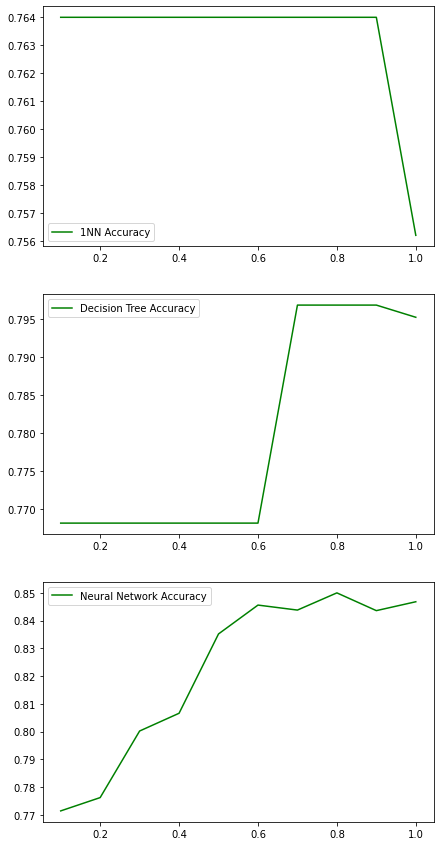

In [270]:
#Plotting results of random subspacing and optimal estimator value
fig,axs = plot.subplots(3, figsize = (7, 15))
axs[0].plot(np.linspace(0.1,1,10), rSS_knn_results, label="1NN Accuracy", color="green")
axs[1].plot(np.linspace(0.1,1,10), rSS_dt_results, label="Decision Tree Accuracy", color="green")
axs[2].plot(np.linspace(0.1,1,10), rSS_nn_results, label="Neural Network Accuracy", color="green")
axs[0].legend()
axs[1].legend()
axs[2].legend()

### Results for 1NN with optimal estimator
The accuracy remains at a stationary 76.4% for all values of max_features with the exception of 1.0 where the accuracy drops to 75.62%.

Highest accuracy: 76.4%, max_features = 0.1 to 0.9 

### Results for Decision Tree with optimal estimator
The accuracy value stays the same (76.82%) for max_features values up to 0.6 after which it increases to 79.68% and later drops slightly to 79.52% for 1.0.

Highest accuracy: 79.86%, max_features = 0.7

### Results for Neural Network with optimal estimator
Fot the Neural Network calssifier, the accuracy tends to increase with larger max_features values. It follows a roughly logarithmic pattern with a final value of 84.68%.

Highest accuracy: 85%, max_features = 0.8

# (e)
Decision Trees and Neural Networks benefit the most from bagging techniques as the are more unstable classifiers. Meanwhile, random subspacing is fit for KNN as it promotes diversity in the ensemble which KNN benefits from.

##### Based on the results:

KNN is best fitted to random subspacing as the accuracy after optimal estimator count and sample count is 76.28% for bagging and 76.4% for random subspacing.

Decision Trees are fitted best for bagging as the accuracy after optimal estimator count and sample count is 79.88% for bagging and 79.86% for random subspacing.

Neural Networks are fitted best for bagging as the accuracy after optimal estimator count and sample count is 84.64% for bagging and 85% for random subspacing.

The result for the Neural Network aren't in line with what I expected. The possible cause of this could be data imbalance or overfitting or the data.

The performance of ensembles could be enhanced by testing higher estimator counts, running more folds on the data and performing further feature selection to acquire more accurate models.

# (f)

# K Nearest Neighbours

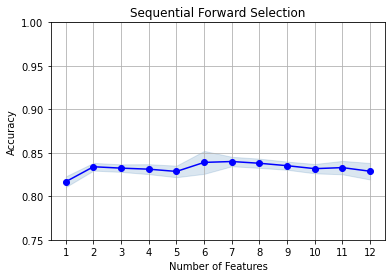

('age', 'workclass', 'education-level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country')


In [271]:
#Splitting data into test and train on the original data frame.
X_train, X_test, Y_train, Y_test = train_test_split(df, income_category, random_state=1)

#Fitting the KNN model with k=3 to the training data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

#Applying the Sequential Forward Selection to the 1NN features.
sfs_forward = SFS(knn, 
                  k_features=12, 
                  forward=True, 
                  floating=False,
                  scoring='accuracy',
                  cv=5)

sfs_forward = sfs_forward.fit(df, income_category, custom_feature_names=df.columns)

#Plotting the SFS to show the point at which the accuracy starts to decrease.
fig1 = plot_sfs(sfs_forward.get_metric_dict(), ylabel='Accuracy')

plot.ylim([0.75, 1])
plot.title('Sequential Forward Selection')
plot.grid()
plot.show()
print(sfs_forward.k_feature_names_)

In [272]:
#As we can see the accuracy has improved compared to the previous 1NN. We will remove the values that decrease accuracy
#and train again 

df_knn = df.drop(columns = ['relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'])

X_train, X_test, Y_train, Y_test = train_test_split(df_knn, income_category, random_state=1)

#Fitting the KNN model to the training data now excluding the columns that decrease accuracy
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [273]:
# Predict on the training dataset 
y_predicted = knn.predict(X_train)
knn_acc = accuracy_score(Y_train, y_predicted)
print(knn_acc)

0.8858666666666667


In [274]:
#We will cross validate to ensure that our model isn't just getting lucky/unlucky with its training data
#and that it actually can perform well for any variety of training data.
#We will shuffle 10 times before creating the folds.
cross_val = KFold(n_splits=10, shuffle=False, random_state=None)

In [275]:
#We will now rerun the tests with the folds included to produce the most fair outcome and the real accuracy of the model using
#this dataset.
#The result is closer to the true accuracy of the model.
results = cross_validate(knn, df_knn, income_category, cv=cross_val, scoring='balanced_accuracy')
test_score = results["test_score"]
print("Accuracy before cross validation: " f"{knn_acc}")
print("Accuracy after cross validation: "f"{test_score.mean():.3f}")
#As we can see the accuracy is better than a random classifier.

Accuracy before cross validation: 0.8858666666666667
Accuracy after cross validation: 0.714


# Decision Tree

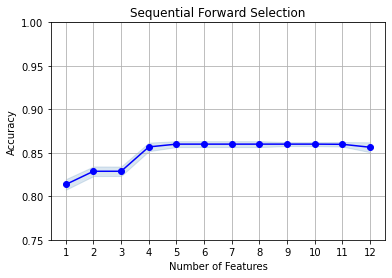

('age', 'workclass', 'education-level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country')


In [276]:
#Splitting data into test and train on the original data frame.
X_train, X_test, Y_train, Y_test = train_test_split(df, income_category, random_state=1)

#Fitting the Decision Tree model to the training data with a max depth of 5
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dt.fit(X_train, Y_train)

#Applying the Sequential Forward Selection to the Decision Tree features.
sfs_forward = SFS(dt, 
                  k_features=12, 
                  forward=True, 
                  floating=False,
                  scoring='accuracy',
                  cv=5)

sfs_forward = sfs_forward.fit(df, income_category, custom_feature_names=df.columns)

#Plotting the SFS to show the point at which the accuracy starts to decrease.
fig1 = plot_sfs(sfs_forward.get_metric_dict(), ylabel='Accuracy')

plot.ylim([0.75, 1])
plot.title('Sequential Forward Selection')
plot.grid()
plot.show()
print(sfs_forward.k_feature_names_)

In [277]:
#Based on the above graph, we can see that after 6 features, the accuracy remains the same so we can just as well drop
#the other features
df_dt = df.drop(columns = [ 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'])

X_train, X_test, Y_train, Y_test = train_test_split(df_dt, income_category, random_state=1)

#Fitting the Decision Tree model to the training data now excluding the columns that decrease accuracy
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [278]:
# Predict on the training dataset 
y_predicted = dt.predict(X_train)
dt_acc = accuracy_score(Y_train, y_predicted)
print(dt_acc)

0.8328


In [279]:
#We will cross validate to ensure that our model isn't just getting lucky/unlucky with its training data
#and that it actually can perform well for any variety of training data.

#We can use the cross_val variable defined before

In [280]:
#We will now rerun the tests with the folds included to produce the most fair outcome and the real accuracy of the model using
#this dataset.
#The result is closer to the true accuracy of the model.
results = cross_validate(dt, df_dt, income_category, cv=cross_val, scoring='balanced_accuracy')
test_score = results["test_score"]
print("Accuracy before cross validation: " f"{dt_acc}")
print("Accuracy after cross validation: "f"{test_score.mean():.3f}")
#As we can see the accuracy is better than a random classifier.

Accuracy before cross validation: 0.8328
Accuracy after cross validation: 0.708


# Neural Network

In [281]:
#Splitting data into test and train using original data frame
X_train, X_test, Y_train, Y_test = train_test_split(df, income_category, random_state=1)

In [282]:
#Fitting the Neural Network model with 20 hidden layers to the training data
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 10), random_state=1)
nn.fit(X_train, Y_train)

C:\Users\Luki\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 10), random_state=1,
              solver='lbfgs')

In [283]:
# Predict on the training dataset 
y_predicted = nn.predict(X_train)
nn_acc = accuracy_score(Y_train, y_predicted)
print(nn_acc)

0.8562666666666666


In [284]:
#We will cross validate to ensure that our model isn't just getting lucky/unlucky with its training data
#and that it actually can perform well for any variety of training data.

#We can use the cross_val variable defined before

In [285]:
#We will now rerun the tests with the folds included to produce the most fair outcome and the real accuracy of the model using
#this dataset.
#The result is closer to the true accuracy of the model.
results = cross_validate(dt, df, income_category, cv=cross_val, scoring='balanced_accuracy')
test_score = results["test_score"]
print("Accuracy before cross validation: " f"{nn_acc}")
print("Accuracy after cross validation: "f"{test_score.mean():.3f}")
#As we can see the accuracy is better than a random classifier.

Accuracy before cross validation: 0.8562666666666666
Accuracy after cross validation: 0.737


### We can now run the ensemble classifiers on the newly defined classifiers. We wil start with bagging.

## Bagging

In [286]:
folds = 7
#We will iterate through the number of estimators, increasing them by 2 each time for a total of 20 at the final loop.

#Below we create lists to store the results of all the iterarions for each classifier with bagging.
bagging_knn_results_new = []

bagging_dt_results_new = []

bagging_nn_results_new = []

for n in range(2,22,2):
    #Creating bagging classifiers for KNN, Decision Tree and Neural Network.
    kNN_bag = BaggingClassifier(knn, 
                            n_estimators = n,
                            max_samples = 1.0, 
                            bootstrap = True, random_state=1)
    tree_bag = BaggingClassifier(dt, 
                            n_estimators = n,
                            max_samples = 1.0,  
                            bootstrap = True, random_state=1)
    nn_bag = BaggingClassifier(nn,
                           n_estimators = n,
                           max_samples = 1.0,
                           bootstrap = True, random_state=1)
    
    #We save the mean results of the bagged classifier into the corresponding lists

    scores_kNN_bag = cross_val_score(kNN_bag, df_knn, income_category, cv=folds, verbose = 0, n_jobs = -1)
    
    bagging_knn_results_new.append(scores_kNN_bag.mean())

    scores_tree_bag = cross_val_score(tree_bag, df_dt, income_category, cv=folds, verbose = 0, n_jobs = -1)

    bagging_dt_results_new.append(scores_tree_bag.mean())

    scores_nn_bag = cross_val_score(nn_bag, df, income_category, cv=folds, verbose = 0, n_jobs = -1)

    bagging_nn_results_new.append(scores_nn_bag.mean())

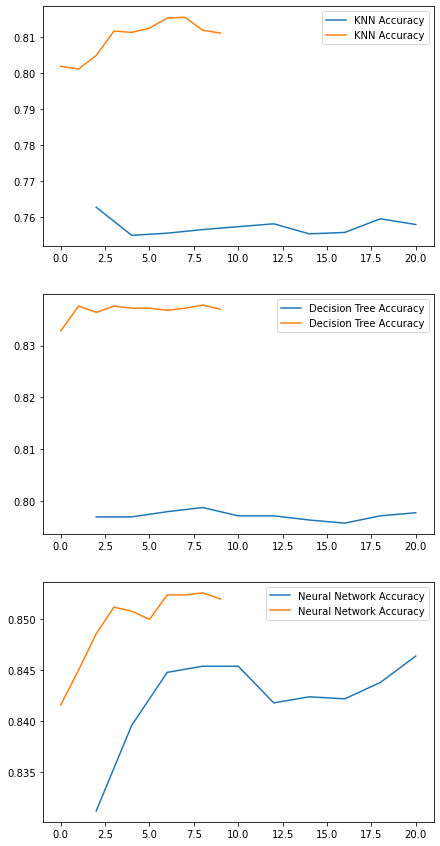

In [287]:
#Plotting results of bagging with adjusted classifiers (blue) vs original classifiers (orange).
fig,axs = plot.subplots(3, figsize = (7, 15)) 
axs[0].plot(range(2,22,2), bagging_knn_results, bagging_knn_results_new, label="KNN Accuracy")
axs[1].plot(range(2,22,2), bagging_dt_results, bagging_dt_results_new, label="Decision Tree Accuracy")
axs[2].plot(range(2,22,2), bagging_nn_results, bagging_nn_results_new, label="Neural Network Accuracy")
axs[0].legend()
axs[1].legend()
axs[2].legend()

As we can see from the above graphs, the accuracy of each classifier increases significantly after adjustment. 

KNN with K=3 increased by roughly 5%

Decision Tree with depth = 5 increased by 4%

Neural Network with 20 hidden layers increased by 2.5%.

### We can now repeat the steps for random subspacing

## Random Subspacing

In [288]:
folds = 7
#We will iterate through the number of estimators, increasing them by 2 each time for a total of 20 at the final loop.

#Below we create lists to store the results of all the iterarions for each classifier with and without bagging.
rSS_knn_results_new = []

rSS_dt_results_new = []

rSS_nn_results_new = []

for n in range(2,22,2):
    #Creating random subspacing classifiers for OneNN, Decision Tree and Neural Network.
    random_SS_kNN = BaggingClassifier(knn, 
                            n_estimators = n,
                            max_samples=1.0, 
                            max_features=0.7, random_state=1)

    random_SS_tree = BaggingClassifier(dt, 
                            n_estimators = n,
                            max_samples=1.0, 
                            max_features=0.7, random_state=1)

    random_SS_nn = BaggingClassifier(nn, 
                            n_estimators = n,
                            max_samples=1.0, 
                            max_features=1.0, random_state=1)
    
    #We save the mean results of the random subspacing classifier into the corresponding lists
    scores_kNN_rSS = cross_val_score(random_SS_kNN, df_knn, income_category, cv=folds, verbose = 0, n_jobs = -1)

    rSS_knn_results_new.append(scores_kNN_rSS.mean())
    
    scores_tree_rSS = cross_val_score(random_SS_tree, df_dt, income_category, cv=folds, verbose = 0, n_jobs = -1)

    rSS_dt_results_new.append(scores_tree_rSS.mean())

    scores_nn_rSS = cross_val_score(random_SS_nn, df, income_category, cv=folds, verbose = 0, n_jobs = -1)

    rSS_nn_results_new.append(scores_nn_rSS.mean())

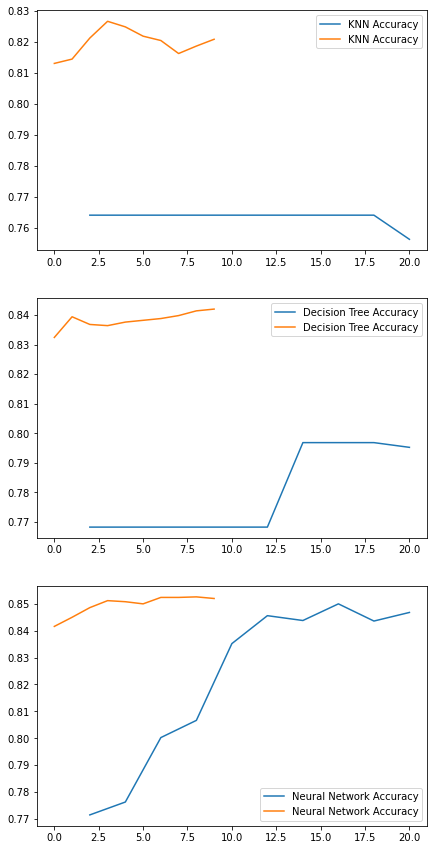

In [291]:
#Plotting results of random subspacing with original classifiers (blue) vs adjusted classifiers (orange)
fig,axs = plot.subplots(3, figsize = (7, 15))
axs[0].plot(range(2,22,2), rSS_knn_results, rSS_knn_results_new, label="KNN Accuracy")
axs[1].plot(range(2,22,2), rSS_dt_results, rSS_dt_results_new, label="Decision Tree Accuracy")
axs[2].plot(range(2,22,2), rSS_nn_results, rSS_nn_results_new, label="Neural Network Accuracy")
axs[0].legend()
axs[1].legend()
axs[2].legend()

As we can see from the above graphs, the accuracy of each classifier increases significantly after adjustment. 

KNN with K=3 increased by roughly 5%.

Decision Tree with depth=5 increased by 6%

Neural Network with 20 hidden layers increased between 7% for lower estimator values and 1% for higher values.

# Question 2

### (a)

The probability of Emma having Covid-19 is 100%. A test with 1.00 specificity and a positive outcome means that the test is guaranteed to be correct.

### (b)

### K Nearest Neighbours
#### (i)
Explaining the reasoning behing KNN is relatively simple especially with the use of a graph or visual plot. The simplest explanation is to say that the classifier chooses a certain number (K) points closest to it and bases the outcome on them.

#### (ii)
For KNN, removing/ignoring the nearest points will allow us to see a change in the prediciton. Since the number of samples is known it is easy to deduce how many closest points are being used to form the prediction. They can also be moved away from the point to change the outcome.

#### (iii)
You can find out the weight by dividing the inverse distance between the points by the sum of the total distances.

### Decision Tree
#### (i)
Explaining the reasoning behind Decision Trees is also very simple especially when using a graphical representation. The decision is reached by following down the branches of the tree based on the feature results until you reach the bottom at which point the outcome is specified. 

#### (ii)
Changing the features to be more discriminant will change the prediction. However, this can take a lot of effort and in some cases cannot be done. Picking different features to split on will also produce a different result.

#### (iii)
The weight in decision trees can be found out by checking the information gained from each split and assigning weights accordingly. 

### SVM
#### (i)
Explanation of SVM is a lot more complex given the extensive mathematical background to the classifier. SVM also consists of different types like polynomial and kernel which require many visual demonstrations and mathematical justification.

#### (ii)
In order to cause a significant change in the outcome almost all of the training examples have to be changed in order to create a scenario where a different type of SVM needs to be used. For example, shifting around many data points to change the SVM type from linear to polynomial. 

#### (iii)
The weight in an SVM can only be determined if the SVM is of a linear type. The hyperplane that divides the points is represented by a series of vectors that are orthogonal to the hyperplane which give the corresponding weights.

### Random Forest
#### (i)
Random Forest classification contains some matahematical background like bagging but the concept behind it is rather simple to explain much like with decision trees. The overall system is a bit more complex but with a competent explanation of decision trees it becomes easy to understand.

#### (ii)
Changing the result of the Random forest is relatively simple as you can run the bagging algorithm on a larger sample or just run several iterations to obtain a different result.

#### (iii)
Weights can be found by giving specific class weights or random weights to attirbutes when constructing each decision tree in the forest.

### Deep Neural Network
#### (i)
Explaining Deep Neural Networks is rather complex. Concepts like neurons, synapses, biases, perceptrons and weights need to be explained in order to properly comprehend the overall implementation. Each of these also contain extensive mathematical backgorunds.

#### (ii)
Changing training examples to alter the prediction is tricky as the Neural Network trains on a closed network with many variables like biases and weights. The best way to change the result is by completely altering the dataset.

#### (iii)
The wights of a DNN can be found by checking the paths leading to the hidden layers from the input layers. 

### (c)
Divisive clustering algorithms are more complex when compared to agglomerative. Divisive clustering requires the data to be split into separate singleton sets at the end of execution. This requires a flat clustering method to achieve this. 

Divisive clustering is less computationally intensive, however. Agglomerative clustering is in the worst case scenario an O($N^3$) algorithm. This is because we need to scan a NxN matrix for the lowest distance on each iteration. With some optimization it can be brought down to O($N^2$) time. Meanwhile, divisive clustering, if utilizling a flat algorithm like K-Means and set number of top layers can have be a linear time algorithm. 

Divisive clustering is more accurate. Agglomerative clustering makes decisions based only on local patterns and neighbour points without taking the global data distribution into account.

#### Single Linkage clustering
A disadvantage of this metric is that it produces clusters where the difference between the closest and furthest pairs is usually considerably large. This can lead to difficulties in defining classes that effectively subdivide the data as it causes "chaining" of data. This leads to long and thin clusters.

#### Complete Linkage clustering
Complete linkage clustering avoids the problems encountered by single linkage clustering. It tends to find clusters that are more compact and that have approximately equal diameters.

#### Average Linkage clustering
A disadvantage of average linkage clustering is that it produces a constant rate of mutations on each lineage of the tree. This is due to the fact that it assumes a constant evolutionary speed.

 ### (d)
Stochastic gradient descent is preferred for larger data sets as it converges fasted when compared to gradient descent. This is because it performs updates on a more frequent basis. 

### (e)
The reason that K-Means clustering is widely used is as follows. First of all, it is easy to implement compared to other clustering algorithms and scales well for large data. The algorithm also guarantees convergence. It is also good at generalizing to different shaped data like elliptical clusters.

 ### (f)
When using random cluster centre initialization the 3 centres are likely to be chosen inside of the first much larger cluster. If enough reassignments are run, there should be no major impact on the final output. 